# 🛍️ Customer Segmentation Analysis

## 🔍 Objective

In today's data-driven world, understanding customer behavior is crucial for strategic business decisions. This project focuses on **grouping customers based on their demographics and purchasing patterns** using unsupervised machine learning techniques.

By segmenting customers effectively, marketing strategies can be tailored to target high-value groups, improve customer satisfaction, and increase revenue.

**Scenario:**  
You are the owner of a shopping mall, and you want to better understand your customer base — specifically, who spends more, who visits frequently, and how to categorize them into meaningful groups for targeted marketing campaigns.


In [5]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



## 📥 Load and Preview Dataset

Let’s import the customer dataset and check the first few entries to understand the structure.


In [6]:
df = pd.read_csv("Mall_Customers.csv")

df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
149,150,Male,34,78,90
73,74,Female,60,50,56
159,160,Female,30,78,73
153,154,Female,38,78,76
126,127,Male,43,71,35


## 🧾 Dataset Summary

Let’s examine the structure and basic statistics of the dataset.

In [7]:
print(f"🧮 Rows: {df.shape[0]} | Columns: {df.shape[1]}")
df.info()

🧮 Rows: 200 | Columns: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


NO NULL Values dataset looks excellent and clean


## 📊 Exploratory Data Analysis (EDA)

Let’s explore distributions and patterns for features like Age, Annual Income, and Spending Score.

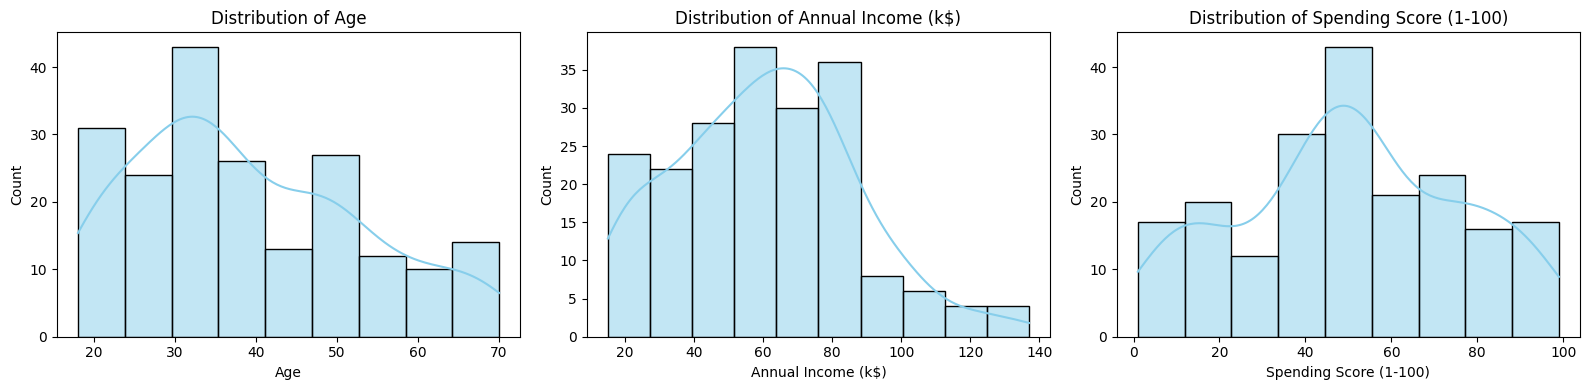

In [10]:

features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
plt.figure(figsize=(16, 4))
for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


## 👥 Gender-wise Distribution

Analyzing customer demographics based on gender.

C:\Users\sidha\AppData\Local\Temp\ipykernel_4168\3853218414.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


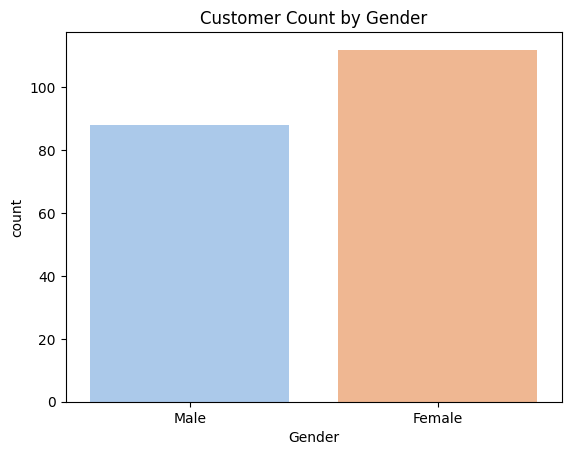

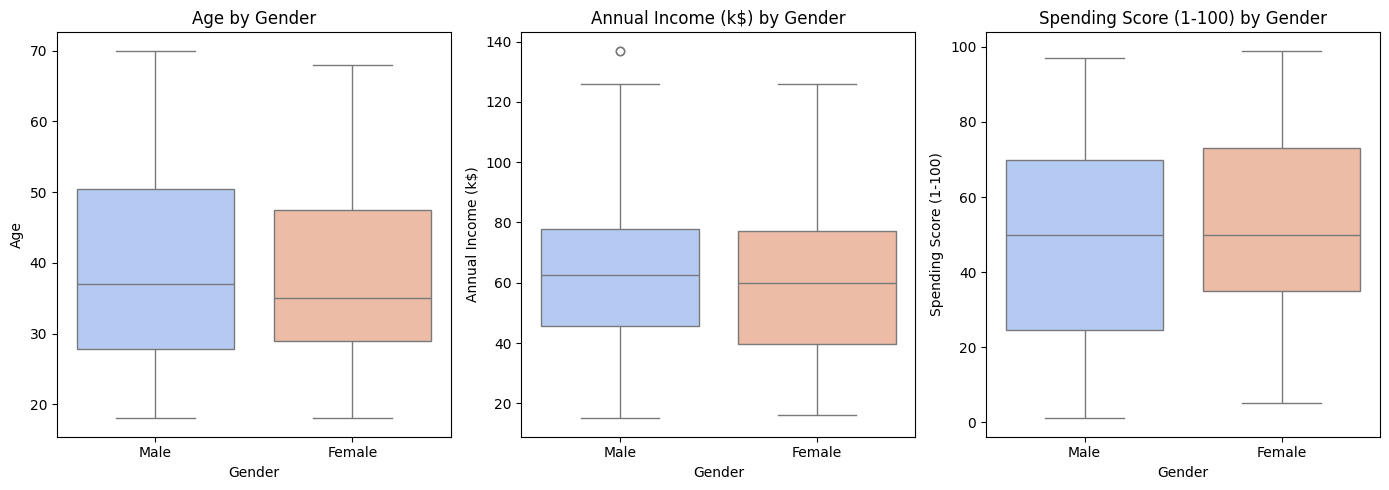

In [17]:

sns.countplot(x='Gender', data=df, palette='pastel')
plt.title("Customer Count by Gender")
plt.show()

plt.figure(figsize=(14,5))
for i, feature in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Gender', y=feature, data=df, hue='Gender', palette='coolwarm', legend=False)

    plt.title(f"{feature} by Gender")
plt.tight_layout()
plt.show()


## 🔥 Correlation Heatmap

Let’s explore relationships between numerical variables.


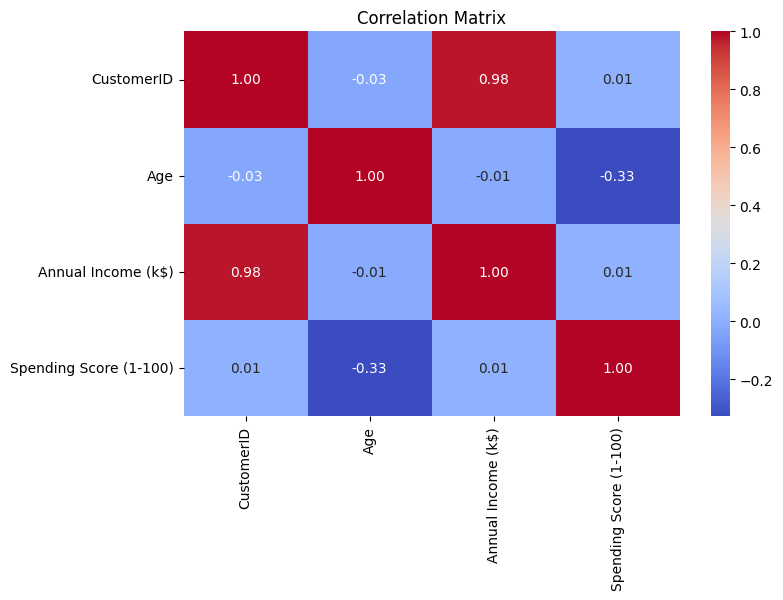

In [ ]:

plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


## 📌 Feature Selection

We will use **Annual Income** and **Spending Score** as the main attributes for clustering.


In [ ]:

X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values


## 📊 Elbow Method for Optimal K

Using the Elbow Method to identify the ideal number of clusters for KMeans.


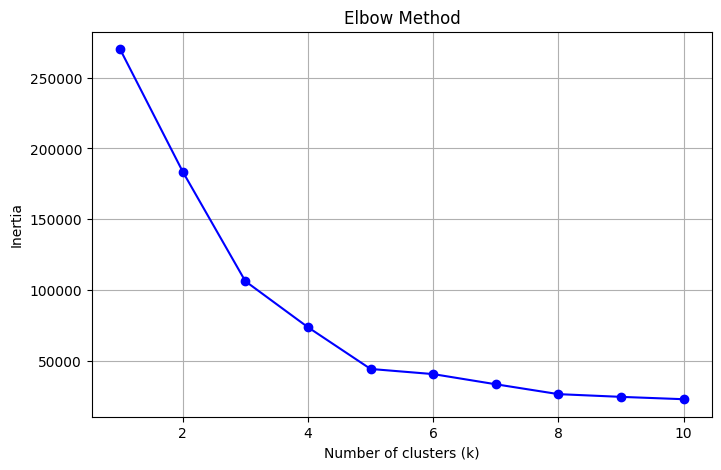

In [14]:
from sklearn.cluster import KMeans

inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot Elbow curve
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()


## 🧠 KMeans Clustering

Let’s apply KMeans with the chosen number of clusters (e.g., `k=5`).


In [ ]:

optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
labels = kmeans.fit_predict(X)

df['Cluster'] = labels


## 🖼️ Cluster Visualization

Visualize the customer groups formed based on income and spending behavior.


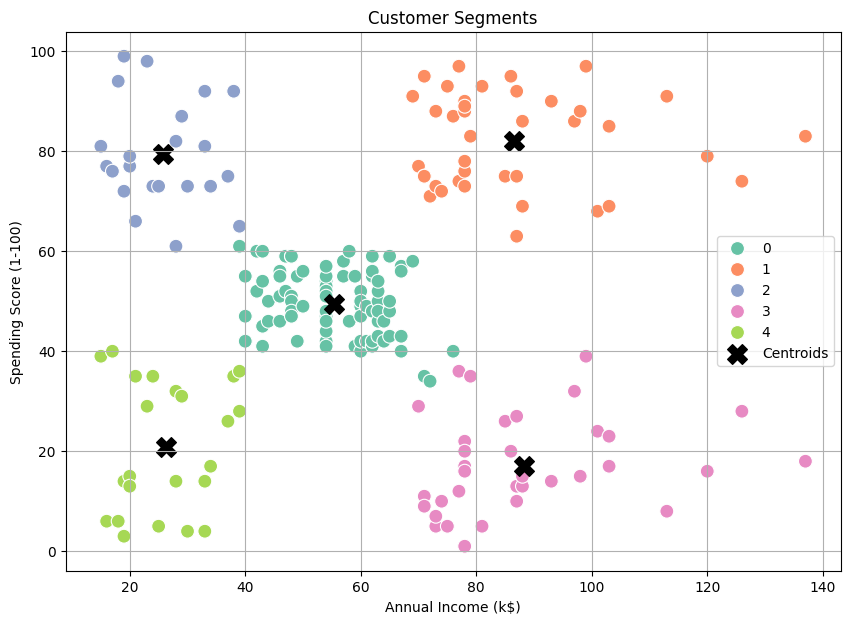

In [16]:
# Plot clusters
plt.figure(figsize=(10,7))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels, palette='Set2', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.legend()
plt.grid(True)
plt.show()


## ✅ Conclusion

In this Customer Segmentation Analysis project, we aimed to group mall customers based on their demographics and spending behavior to support targeted marketing strategies.

Here's what we accomplished:

- 📊 **Exploratory Data Analysis** revealed useful insights such as:
  - Income and spending score distributions
  - Gender-based differences in customer spending
  - Correlation patterns between features

- 🧠 **KMeans Clustering** was applied using the Elbow Method to determine the optimal number of customer groups (clusters). We found that:
  - **5 distinct clusters** provided a meaningful segmentation of customers based on their **Annual Income** and **Spending Score**.

- 🎯 **Cluster Visualization** allowed us to clearly see how customers are grouped:
  - High spenders with high income
  - Low income but high spenders (potentially loyal but price-sensitive)
  - High income but low spenders (potential upsell opportunities)
  - Medium income and medium spending score (balanced segment)
  - Low income and low spending (least priority for marketing)

### 📌 Business Takeaways

- Tailored marketing campaigns can now be designed for each segment.
- Premium products/services can target high-income, high-spending groups.
- Promotions or loyalty programs can re-engage lower-spending segments.
- Strategic focus can shift based on the size and value of each cluster.

---

🎉 With a simple yet effective unsupervised machine learning approach, we have built a strong foundation for data-driven customer segmentation.
